# Prediction of Bitcoin Prices: Comparison of LSTM and GRU

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU,LSTM
from keras import optimizers 
import tensorflow as tf
import sklearn.metrics as sm
from keras.preprocessing.sequence import TimeseriesGenerator

seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# Importing the dataset and describing

In [17]:
path_to_data = "../dataset/BTC-Hourly.csv" 
df = pd.read_csv(path_to_data,index_col='date', parse_dates=['date']) 
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,3.325900e+04,33259.000000,33259.000000,33259.000000,33259.000000,3.325900e+04,3.325900e+04
mean,1.586228e+09,20119.546772,20232.957473,19997.069777,20120.684800,1.612380e+06,2.965701e+06
std,3.456429e+07,18537.219607,18646.950933,18418.320297,18537.695044,3.102328e+06,7.329787e+06
min,1.526364e+09,3139.760000,3158.340000,3122.280000,3139.760000,0.000000e+00,0.000000e+00
25%,1.556296e+09,7022.865000,7055.835000,6970.570000,7022.865000,1.903241e+02,1.682800e+02
50%,1.586228e+09,9700.040000,9740.270000,9657.000000,9700.320000,6.093271e+05,5.248300e+02
75%,1.616161e+09,36415.305000,36735.380000,36104.235000,36423.040000,1.929240e+06,3.120014e+06
max,1.646093e+09,68635.050000,69000.000000,68447.000000,68627.010000,6.857061e+07,2.582324e+08


# Checking the dataset for NULL values

In [18]:
df.isnull().values.any()

False

# Plotting the dataset

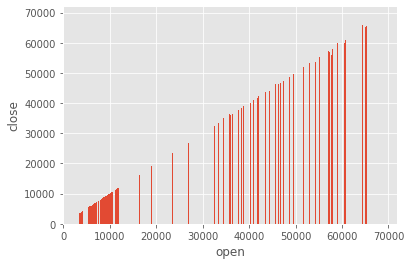

In [19]:

plt.bar(df['open'],df['close'])
plt.xlabel('open')
plt.ylabel('close')
plt.show()

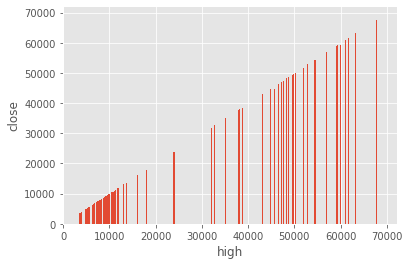

In [20]:

plt.bar(df['high'],df['close'])
plt.xlabel('high')
plt.ylabel('close')
plt.show()

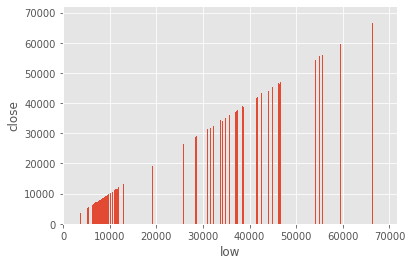

In [21]:

plt.bar(df['low'],df['close'])
plt.xlabel('low')
plt.ylabel('close')
plt.show()


# Feature Selection and plotting the dataset

 Count row of data:  33259


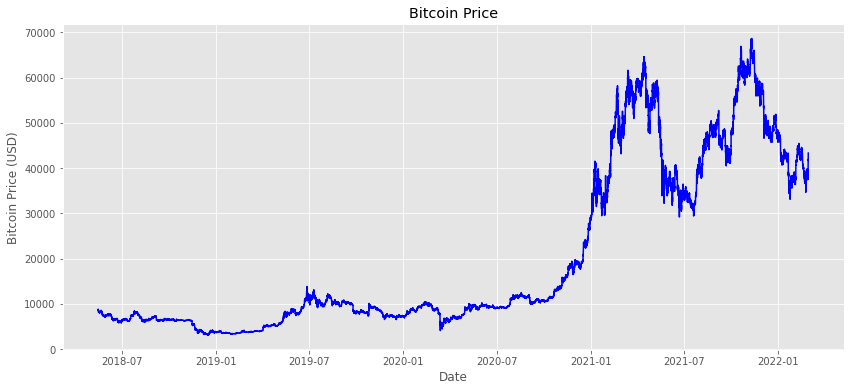

In [22]:

dataset = pd.DataFrame(df['close'])
print(' Count row of data: ',len(dataset))
#to order ascending
dataset=dataset.iloc[::-1]
fig = plt.figure(figsize=(14, 6))
plt.plot(dataset,color="blue")
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Bitcoin Price')
plt.show()

# Preprocessing Data

## Normalization Using Min-Max

In [23]:
dataset_norm = dataset.copy()
dataset[['close']]
scaler = MinMaxScaler()
dataset_norm['close'] = scaler.fit_transform(dataset[['close']])
dataset_norm


,close
date,
2018-05-15 06:00:00,0.085532
2018-05-15 07:00:00,0.085501
2018-05-15 08:00:00,0.085341
2018-05-15 09:00:00,0.085033
2018-05-15 10:00:00,0.086370
...,...
2022-02-28 20:00:00,0.592103
2022-02-28 21:00:00,0.588203
2022-02-28 22:00:00,0.607257


## Graph Data Normalized

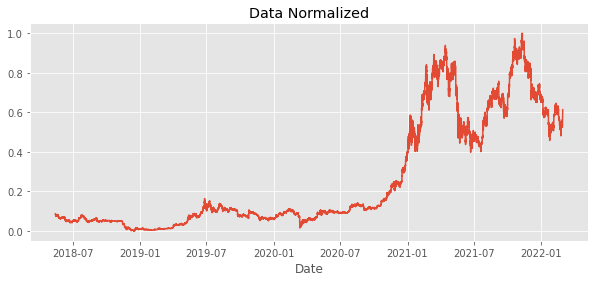

In [24]:
fig = plt.figure(figsize=(10, 4))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Normalized')
plt.show()

##

# MODEL CREATION

## DATA PARTITION

In [25]:
# Partition data into data train, val & test
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.75)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.15)

# Store data into each partition
training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

## TRAINING DATA GRAPH

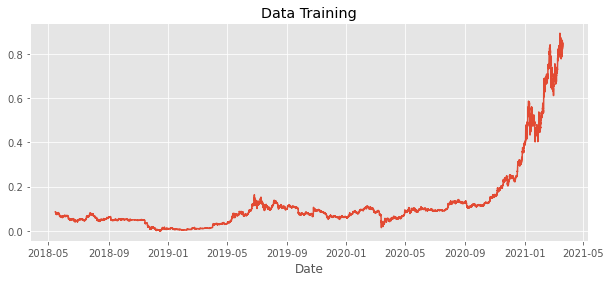

,close
date,
2018-05-15 06:00:00,0.085532
2018-05-15 07:00:00,0.085501
2018-05-15 08:00:00,0.085341
2018-05-15 09:00:00,0.085033
2018-05-15 10:00:00,0.086370
...,...
2021-03-19 09:00:00,0.842100
2021-03-19 10:00:00,0.847065
2021-03-19 11:00:00,0.850596


In [26]:
# graph of data training
fig = plt.figure(figsize=(10, 4))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Training')
plt.show()
training_set

## DATA VALIDATION GRAPH

,close
date,
2021-03-19 14:00:00,0.848515
2021-03-19 15:00:00,0.853007
2021-03-19 16:00:00,0.851354
2021-03-19 17:00:00,0.851709
2021-03-19 18:00:00,0.850357
...,...
2021-08-04 22:00:00,0.558810
2021-08-04 23:00:00,0.558908
2021-08-05 00:00:00,0.556097


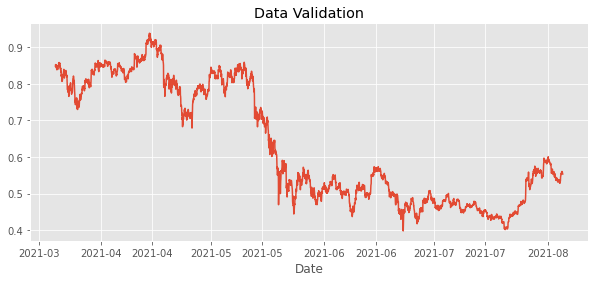

In [27]:
# graph of data validation
fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Validation')
val_set

## TEST DATA GRAPH

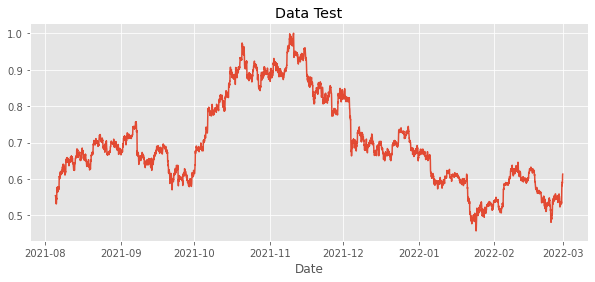

,close
date,
2021-08-05 03:00:00,0.554312
2021-08-05 04:00:00,0.553270
2021-08-05 05:00:00,0.552882
2021-08-05 06:00:00,0.548914
2021-08-05 07:00:00,0.545520
...,...
2022-02-28 20:00:00,0.592103
2022-02-28 21:00:00,0.588203
2022-02-28 22:00:00,0.607257


In [28]:
# graph of data test
fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Test')
plt.show()
test_set

## CREATING GENERATORS

In [29]:
look_back = 15

train_generator = TimeseriesGenerator(training_set, training_set, length=look_back, batch_size=512)     
test_generator = TimeseriesGenerator(test_set, test_set, length=look_back, batch_size=1)
validation_generator = TimeseriesGenerator(val_set, val_set, length=look_back, batch_size=1)

# MODEL LSTM

In [30]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit=30
batch_size=512
epoch = 100
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=learning_rate)
METRICS = [tf.keras.metrics.Accuracy()]

# Architecture LSTM
regressorLSTM = Sequential()

# First LSTM layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit, return_sequences=True, input_shape=(look_back,1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit))
regressorLSTM.add(Dropout(0.2))

# Output layer
regressorLSTM.add(Dense(units=1))

# Compiling the LSTM
regressorLSTM.compile(optimizer=OPTIMIZER,loss=tf.losses.mean_squared_error)

regressorLSTM.summary()

# Fitting  data training dan data validation
pred = regressorLSTM.fit(train_generator, validation_data=validation_generator, epochs=epoch,verbose=1)

regressorLSTM.save("LSTM.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 15, 30)            3840      
                                                                 
 dropout_4 (Dropout)         (None, 15, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 15, 30)            7320      
                                                                 
 dropout_5 (Dropout)         (None, 15, 30)            0         
                                                                 
 lstm_6 (LSTM)               (None, 15, 30)            7320      
                                                                 
 dropout_6 (Dropout)         (None, 15, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 30)               

KeyError: 15

## TRAINING LOSS AND VALIDATION LOSS GRAPH

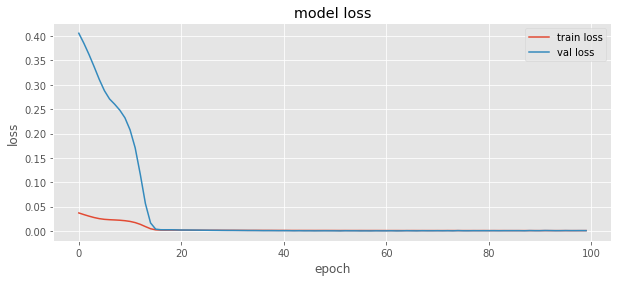

In [ ]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

## Training Loss & Validation Loss Table

In [ ]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.000768,0.000697


## Implementation Model into Data Test

In [ ]:
# Implementation model into data test
y_pred_test = regressorLSTM.predict_generator(test_generator)

# Invert normalization min-max
y_pred_invert_norm = scaler.inverse_transform(y_pred_test)



x_test:  [[[0.55431248]]

 [[0.55326953]]

 [[0.55288197]]

 ...

 [[0.58820259]]

 [[0.60725653]]

 [[0.61140482]]]


## Comparison Data Test with Prediction Results

In [ ]:
# Comparison data test with data prediction
datacompareLSTM = pd.DataFrame()
datatest=np.array(dataset['close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred_invert_norm

datacompareLSTM['Data Test'] = datatest
datacompareLSTM['Prediction Results'] = datapred
datacompareLSTM

,Data Test,Prediction Results
0,39371.86,39360.738281
1,39346.48,39296.851562
2,39086.66,39273.105469
3,38864.34,39029.734375
4,38473.23,38821.089844
...,...,...
4984,41914.97,41144.273438
4985,41659.53,41651.503906
4986,42907.32,41417.277344
4987,43178.98,42556.449219


## Prediction Results Evaluation

In [ ]:
# Calculatre value of Root Mean Square Error 
def rmse(datatest, datapred):
    return np.round(np.sqrt(np.mean((datapred - datatest) ** 2)), 4)
print('Result Root Mean Square Error LSTM :',rmse(datatest, datapred))

def mape(datatest, datapred): 
    return np.round(np.mean(np.abs((datatest - datapred) / datatest) * 100), 4)
    
print('Result Mean Absolute Percentage Error LSTM : ', mape(datatest, datapred), '%')

print("Model Accuracy:",100-mape(datatest, datapred), '%')

Result Root Mean Square Error LSTM : 10473.7572
Result Mean Absolute Percentage Error LSTM :  16.9124 %
Model Accuracy: 83.0876 %


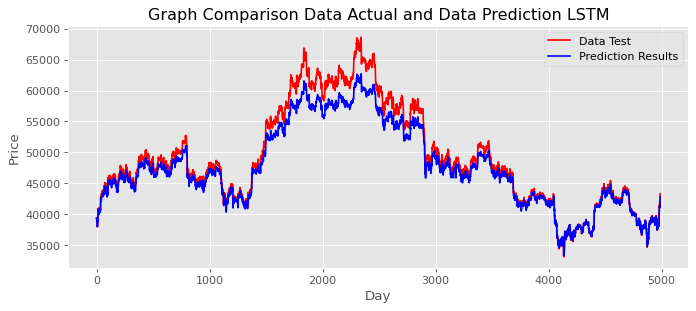

In [ ]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction LSTM')
plt.plot(datacompareLSTM['Data Test'], color='red',label='Data Test')
plt.plot(datacompareLSTM['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


# MODEL GRU

In [ ]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit=30
batch_size=512
epoch = 100
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Architecture Gated Recurrent Unit
regressorGRU = Sequential()

# First GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressorGRU.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit))
regressorGRU.add(Dropout(0.2))

# Output layer 
regressorGRU.add(Dense(units=1))

# Compiling the GRU
regressorGRU.compile(optimizer=OPTIMIZER,loss='mean_squared_error')

# Fitting ke data training dan data validation
pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=batch_size, epochs=epoch,verbose=1)

regressorGRU.save("GRU.h5")

Epoch 1/100
49/49 [==============================] - 7s 33ms/step - loss: 0.0334 - val_loss: 0.3562
Epoch 2/100
49/49 [==============================] - 1s 10ms/step - loss: 0.0256 - val_loss: 0.2908
Epoch 3/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0216 - val_loss: 0.2408
Epoch 4/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0195 - val_loss: 0.2106
Epoch 5/100
49/49 [==============================] - 1s 12ms/step - loss: 0.0169 - val_loss: 0.1690
Epoch 6/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0125 - val_loss: 0.1085
Epoch 7/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0070 - val_loss: 0.0401
Epoch 8/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 9/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0015 - val_loss: 8.1269e-04
Epoch 10/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0014 - val_loss: 8.

## TRAINING LOSS AND VALIDATION LOSS GRAPH

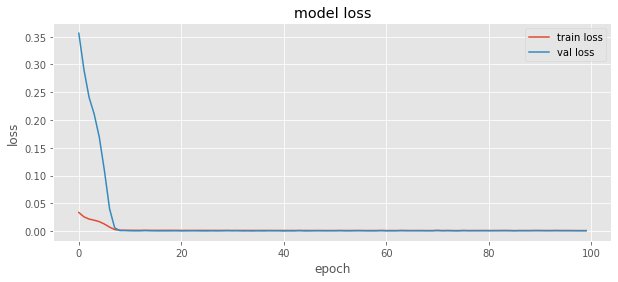

In [ ]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

## Training Loss & Validation Loss Table

In [ ]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.00074,0.000645


## Implementation Model into Data Test

In [ ]:
# Implementation model into data test
y_pred_test = regressorGRU.predict(x_test)

# Invert normalization min-max
y_pred_invert_norm = scaler.inverse_transform(y_pred_test)


## Comparison Data Test with Prediction Results

In [ ]:
# Comparison data test with data prediction
datacompareGRU = pd.DataFrame()
datatest=np.array(dataset['close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred_invert_norm

datacompareGRU['Data Test'] = datatest
datacompareGRU['Prediction Results'] = datapred
datacompareGRU

,Data Test,Prediction Results
0,39371.86,39222.902344
1,39346.48,39159.695312
2,39086.66,39136.207031
3,38864.34,38895.503906
4,38473.23,38689.238281
...,...,...
4984,41914.97,40990.902344
4985,41659.53,41495.039062
4986,42907.32,41262.160156
4987,43178.98,42396.097656


## Prediction Results Evaluation

In [ ]:
# Calculatre value of Root Mean Square Error 
def rmse(datatest, datapred):
    return np.round(np.sqrt(np.mean((datapred - datatest) ** 2)), 4)
print('Result Root Mean Square Error GRU :',rmse(datatest, datapred))

def mape(datatest, datapred): 
    return np.round(np.mean(np.abs((datatest - datapred) / datatest) * 100), 4)
    
print('Result Mean Absolute Percentage Error GRU : ', mape(datatest, datapred), '%')

print("Model Accuracy:",100-mape(datatest, datapred), '%')

Result Root Mean Square Error GRU : 10583.5176
Result Mean Absolute Percentage Error GRU :  17.0735 %
Model Accuracy: 82.9265 %


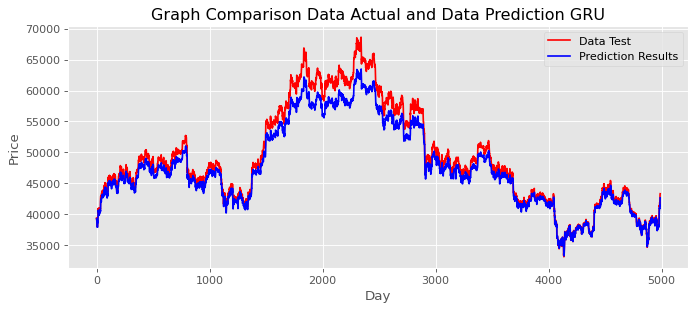

In [ ]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction GRU' )
plt.plot(datacompareGRU['Data Test'], color='red',label='Data Test')
plt.plot(datacompareGRU['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()

plt.show()


# MODELS COMPARISON GRAPH

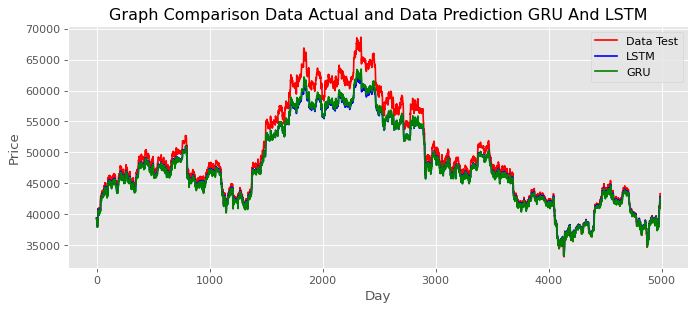

In [ ]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction GRU And LSTM' )
plt.plot(datacompareGRU['Data Test'], color='red',label='Data Test')
plt.plot(datacompareLSTM['Prediction Results'], color='blue',label='LSTM')
plt.plot(datacompareGRU['Prediction Results'], color='green',label='GRU')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()                                                                                                                                              
plt.show()